In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from pathlib import Path
from analysis.datasets import *
from analysis.downloads import *
from analysis.explorative_analysis import *

### Load Penmanshiel Turbine 09 Data

In [2]:
turbine_2016 = load_turbine_electricity_data_dynamic(2016)
turbine_2016

Attempting to load file: ..\data\zenodo_turbine_data\raw\2016\Turbine_Data_Penmanshiel_09_2016-06-24_-_2017-01-01_1049.csv


,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2016-06-24 11:40:00,0.00,0.00,0.00,0.00,5.8,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN
2016-06-24 11:50:00,5.45,0.64,2.74,6.91,5.8,5.55,0.67,2.67,6.99,5.36,...,NaN,NaN,NaN,NaN,NaN,0.58,0.28,0.05,NaN,NaN
2016-06-24 12:00:00,4.51,1.08,1.84,6.28,5.8,4.61,1.12,1.84,6.43,4.42,...,NaN,NaN,NaN,NaN,NaN,0.56,0.29,0.05,NaN,NaN
2016-06-24 12:10:00,3.59,0.64,1.99,5.01,5.8,3.59,0.65,1.98,5.06,3.58,...,NaN,NaN,NaN,NaN,NaN,0.58,0.30,0.05,NaN,NaN
2016-06-24 12:20:00,4.48,0.40,2.92,5.11,5.8,4.53,0.38,3.03,5.19,4.43,...,NaN,NaN,NaN,NaN,NaN,0.68,0.25,0.06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:10:00,5.20,0.61,3.50,7.33,8.3,5.26,0.55,3.68,7.14,5.14,...,NaN,NaN,NaN,NaN,NaN,0.97,0.28,0.10,NaN,NaN
2016-12-31 23:20:00,4.85,0.94,2.32,8.08,8.3,4.93,0.89,2.76,7.93,4.76,...,NaN,NaN,NaN,NaN,NaN,1.45,0.32,0.15,NaN,NaN
2016-12-31 23:30:00,6.48,0.96,4.71,11.34,8.3,6.51,0.94,5.05,11.03,6.45,...,NaN,NaN,NaN,NaN,NaN,1.78,0.31,0.19,NaN,NaN


The variable Lost Production is a rough way to restrict the data to entries where the turbine is in normal operation

In [3]:
turbine_2016["Lost Production to Downtime and Curtailment Total (kWh)"].describe()


count    27434.000000
mean        27.009534
std         62.420456
min          0.000000
25%          0.000000
50%          0.000000
75%         11.500431
max        342.939982
Name: Lost Production to Downtime and Curtailment Total (kWh), dtype: float64

In [4]:
count_zero_values = (turbine_2016["Lost Production to Downtime and Curtailment Total (kWh)"] == 0).sum()

print(f"Number of rows where the column is equal to 0: {count_zero_values}")

Number of rows where the column is equal to 0: 19649


In [5]:
count_nan_values = turbine_2016["Lost Production to Downtime and Curtailment Total (kWh)"].isna().sum()

print(f"Number of rows where the column is NaN: {count_nan_values}")

Number of rows where the column is NaN: 0


In [6]:
count_non_zero_values = (turbine_2016["Lost Production to Downtime and Curtailment Total (kWh)"] != 0).sum()

print(f"Number of rows where the column is not equal to 0: {count_non_zero_values}")

Number of rows where the column is not equal to 0: 7785


In [7]:
(count_zero_values + count_non_zero_values) == turbine_2016.shape[0]

np.True_

Summary statistics for time frame: 2016-06-24 - 2016-12-31
First 5 rows of the dataframe:


,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2016-06-24 11:40:00,0.00,0.00,0.00,0.00,5.8,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN
2016-06-24 11:50:00,5.45,0.64,2.74,6.91,5.8,5.55,0.67,2.67,6.99,5.36,...,NaN,NaN,NaN,NaN,NaN,0.58,0.28,0.05,NaN,NaN
2016-06-24 12:00:00,4.51,1.08,1.84,6.28,5.8,4.61,1.12,1.84,6.43,4.42,...,NaN,NaN,NaN,NaN,NaN,0.56,0.29,0.05,NaN,NaN
2016-06-24 12:10:00,3.59,0.64,1.99,5.01,5.8,3.59,0.65,1.98,5.06,3.58,...,NaN,NaN,NaN,NaN,NaN,0.58,0.30,0.05,NaN,NaN
2016-06-24 12:20:00,4.48,0.40,2.92,5.11,5.8,4.53,0.38,3.03,5.19,4.43,...,NaN,NaN,NaN,NaN,NaN,0.68,0.25,0.06,NaN,NaN



Last 5 rows of the dataframe:


,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2016-12-31 23:10:00,5.20,0.61,3.50,7.33,8.3,5.26,0.55,3.68,7.14,5.14,...,NaN,NaN,NaN,NaN,NaN,0.97,0.28,0.10,NaN,NaN
2016-12-31 23:20:00,4.85,0.94,2.32,8.08,8.3,4.93,0.89,2.76,7.93,4.76,...,NaN,NaN,NaN,NaN,NaN,1.45,0.32,0.15,NaN,NaN
2016-12-31 23:30:00,6.48,0.96,4.71,11.34,8.3,6.51,0.94,5.05,11.03,6.45,...,NaN,NaN,NaN,NaN,NaN,1.78,0.31,0.19,NaN,NaN
2016-12-31 23:40:00,7.19,0.92,4.24,9.61,8.3,7.21,0.90,4.19,9.58,7.18,...,NaN,NaN,NaN,NaN,NaN,2.02,0.28,0.29,NaN,NaN
2016-12-31 23:50:00,6.21,1.17,3.29,9.79,8.3,6.28,1.13,3.66,9.61,6.13,...,NaN,NaN,NaN,NaN,NaN,1.86,0.30,0.28,NaN,NaN



Summary statistics of the dataframe for time frame: 2016-06-24 - 2016-12-31


,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
count,18991.000000,18991.000000,18991.000000,18991.000000,27434.000000,18950.000000,18950.000000,18578.000000,18950.000000,18991.000000,...,0.0,0.0,0.0,0.0,0.0,18991.000000,18991.000000,18991.000000,0.0,0.0
mean,6.342873,0.888857,3.993442,8.934569,7.018809,6.371416,0.829850,4.362678,8.779053,6.315316,...,NaN,NaN,NaN,NaN,NaN,1.668908,0.309133,0.210938,NaN,NaN
std,3.575266,0.548894,2.471138,5.038356,1.018994,3.490248,0.477844,2.496182,4.742867,3.617699,...,NaN,NaN,NaN,NaN,NaN,1.097953,0.054827,0.161229,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,5.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,3.980000,0.520000,2.280000,5.540000,6.000000,4.100000,0.500000,2.752500,5.560000,3.900000,...,NaN,NaN,NaN,NaN,NaN,0.780000,0.270000,0.070000,NaN,NaN
50%,5.690000,0.760000,3.640000,7.970000,6.900000,5.800000,0.730000,4.020000,7.970000,5.590000,...,NaN,NaN,NaN,NaN,NaN,1.340000,0.300000,0.160000,NaN,NaN
75%,7.945000,1.100000,5.225000,11.160000,8.100000,8.020000,1.040000,5.570000,11.090000,7.880000,...,NaN,NaN,NaN,NaN,NaN,2.350000,0.335000,0.320000,NaN,NaN
max,24.260000,5.420000,17.530001,31.580000,8.300000,22.299999,4.800000,16.500000,29.639999,24.910000,...,NaN,NaN,NaN,NaN,NaN,21.590000,0.710000,1.030000,NaN,NaN


Expected number of entries: 27434 (2016-06-24 11:40:00 - 2016-12-31 23:50:00) 
Actual number of entries: 27434

Shape of dataframe (rows, columns) for time frame: 2016-06-24 - 2016-12-31


(27434, 299)


Checking for duplicates in the index for time frame: 2016-06-24 - 2016-12-31
Index column has no duplicates.

Rows with NaN values:
In total there are: 27434 for time frame 2016-06-24 - 2016-12-31


,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2016-06-24 11:40:00,0.00,0.00,0.00,0.00,5.8,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN
2016-06-24 11:50:00,5.45,0.64,2.74,6.91,5.8,5.55,0.67,2.67,6.99,5.36,...,NaN,NaN,NaN,NaN,NaN,0.58,0.28,0.05,NaN,NaN
2016-06-24 12:00:00,4.51,1.08,1.84,6.28,5.8,4.61,1.12,1.84,6.43,4.42,...,NaN,NaN,NaN,NaN,NaN,0.56,0.29,0.05,NaN,NaN
2016-06-24 12:10:00,3.59,0.64,1.99,5.01,5.8,3.59,0.65,1.98,5.06,3.58,...,NaN,NaN,NaN,NaN,NaN,0.58,0.30,0.05,NaN,NaN
2016-06-24 12:20:00,4.48,0.40,2.92,5.11,5.8,4.53,0.38,3.03,5.19,4.43,...,NaN,NaN,NaN,NaN,NaN,0.68,0.25,0.06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:10:00,5.20,0.61,3.50,7.33,8.3,5.26,0.55,3.68,7.14,5.14,...,NaN,NaN,NaN,NaN,NaN,0.97,0.28,0.10,NaN,NaN
2016-12-31 23:20:00,4.85,0.94,2.32,8.08,8.3,4.93,0.89,2.76,7.93,4.76,...,NaN,NaN,NaN,NaN,NaN,1.45,0.32,0.15,NaN,NaN
2016-12-31 23:30:00,6.48,0.96,4.71,11.34,8.3,6.51,0.94,5.05,11.03,6.45,...,NaN,NaN,NaN,NaN,NaN,1.78,0.31,0.19,NaN,NaN



First index with NaN values:
2016-06-24 11:40:00

Last index with NaN values:
2016-12-31 23:50:00
Plotting histogram for: Power (kW) for 2016-06-24 - 2016-12-31


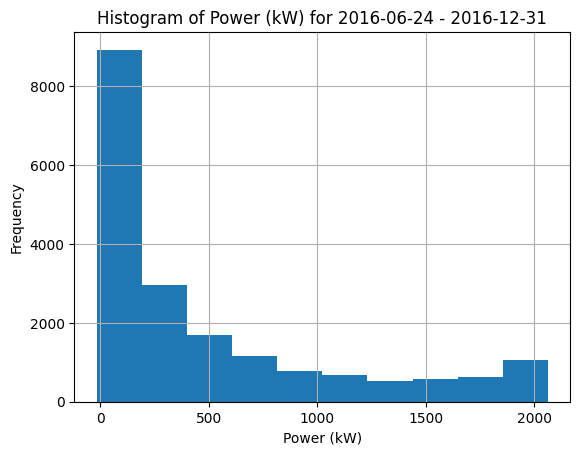


Plotting monthly time series of Power (kW) data for the time period 2016-06-24 - 2016-12-31:


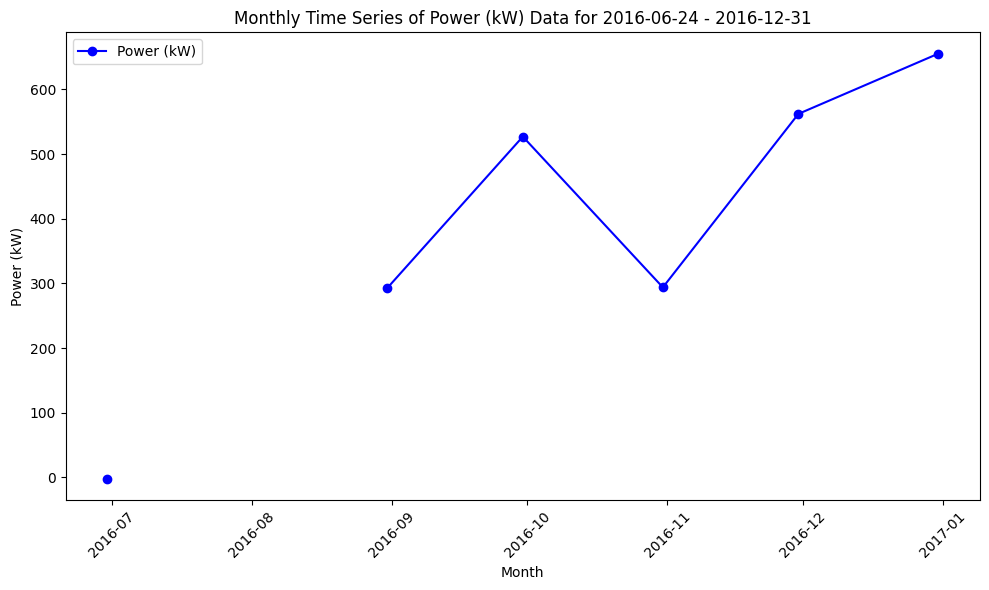

No wind speed columns found. Skipping wind speed plots.
Filtered data for Power (kW) in 11/2016: 4320 records found.


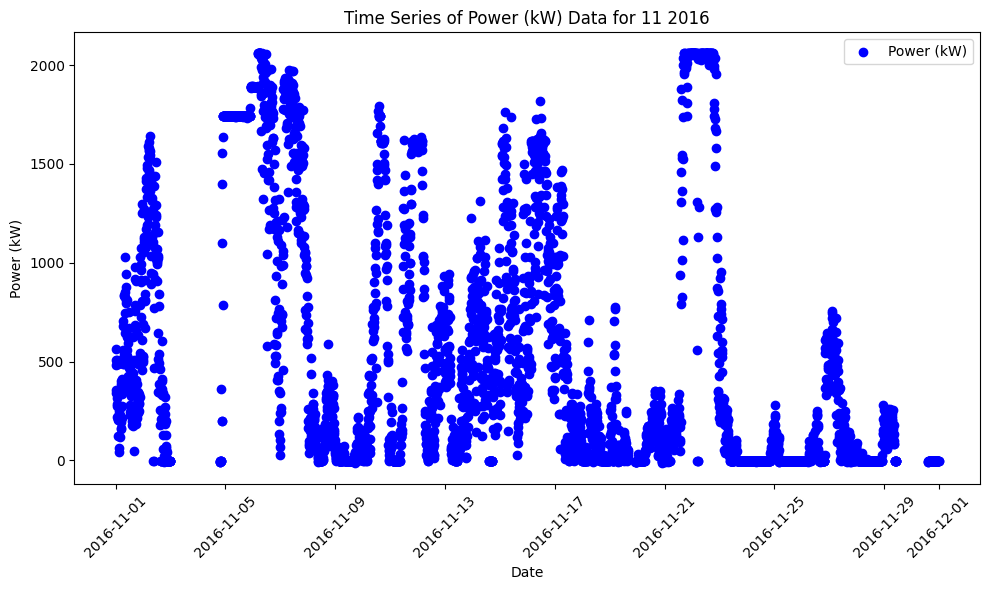

In [8]:
explorative_analysis(turbine_2016)

### Custom Power Curve for Wind Turbine

This section is about a custom power curve for a wind turbine based on wind speed \( v \). The idea is to use the function 1- exp(-x) to model a function that grows from zero at x = 0 to a constant value at large x. Theoretically we expect power to grow like v**3 where v is the wind speed. To obtain a better fit, I actually use a polynomial of degree 3. Since the power starts first at a minimum wind speed, I use the variable v - v_cut to shift the curve to the right. In addition, the wind turbine stops if the wind speed is to large, 22 m/s in my case. The parameters of this function are then fitted to the theoretical power curve data published by the producer (pairs wind speed, power)

$$
P(v) = 
\begin{cases} 
    0, & \text{if } v \leq v_{\text{cut}} \text{ or } v > 22 \\ 
    \left(1 - \exp \left( -\left( \lambda_1 (v - v_{\text{cut}}) + \lambda_2 (v - v_{\text{cut}})^2 + \lambda_3 (v - v_{\text{cut}})^3 \right) \right) \right) \cdot 2050, & \text{if } v_{\text{cut}} < v \leq 22
\end{cases}
$$

where:

- $ v $ is the wind speed,
- $v_{\text{cut}} = 3.8$ m/s is the cut-in wind speed,
- $\lambda_1$, $\lambda_2$, and $\lambda_3$ are constants that shape the curve,
- The maximum power output is capped at 2050 kW.

Plotting the relationship between Wind Speed and Power by defining a custom power curve function and a function to fit it to wind power data, then plot the results.
This custsom power curve function controls the shape of the power curve, which starts from zero at low speeds, increases, and approaches a maximum (2050 kW, the rated power) as wind speed rises.

Theoretical wind speed and power values from the producer

In [9]:
d = [
    [0, 0],
    [0.5, 0],
    [1, 0],
    [1.5, 0],
    [2, 0],
    [2.5, 0],
    [3, 0],
    [3.5, 0],
    [4, 55],
    [4.5, 110],
    [5, 186],
    [5.5, 264],
    [6, 342],
    [6.5, 424],
    [7, 506],
    [7.5, 618],
    [8, 730],
    [8.5, 865],
    [9, 999],
    [9.5, 1195],
    [10, 1391],
    [10.5, 1558],
    [11, 1724],
    [11.5, 1829],
    [12, 1909],
    [12.5, 1960],
    [13, 2002],
    [13.5, 2025],
    [14, 2044],
    [14.5, 2050],
    [15, 2050],
    [15.5, 2050],
    [16, 2050],
    [16.5, 2050],
    [17, 2050],
    [17.5, 2050],
    [18, 2050],
    [18.5, 2050],
    [19, 2050],
    [19.5, 2050],
    [20, 2050],
    [20.5, 2050],
    [21, 2050],
    [21.5, 2050],
    [22, 2050],
    [22.5, 0],
    [23, 0],
    [23.5, 0],
    [24, 0],
    [24.5, 0],
    [25, 0],
    [25.5, 0],
    [26, 0],
    [26.5, 0],
    [27, 0],
    [27.5, 0],
    [28, 0],
    [28.5, 0],
    [29, 0],
    [29.5, 0],
    [30, 0],
    [30.5, 0],
    [31, 0],
    [31.5, 0],
    [32, 0],
    [32.5, 0],
    [33, 0],
    [33.5, 0],
    [34, 0],
    [34.5, 0],
    [35, 0],
]


theoretical_producer_data = pd.DataFrame(d, columns=["wind_speed", "power"])

wind_speeds_theoretical = theoretical_producer_data["wind_speed"].values
power_output_theoretical = theoretical_producer_data["power"].values

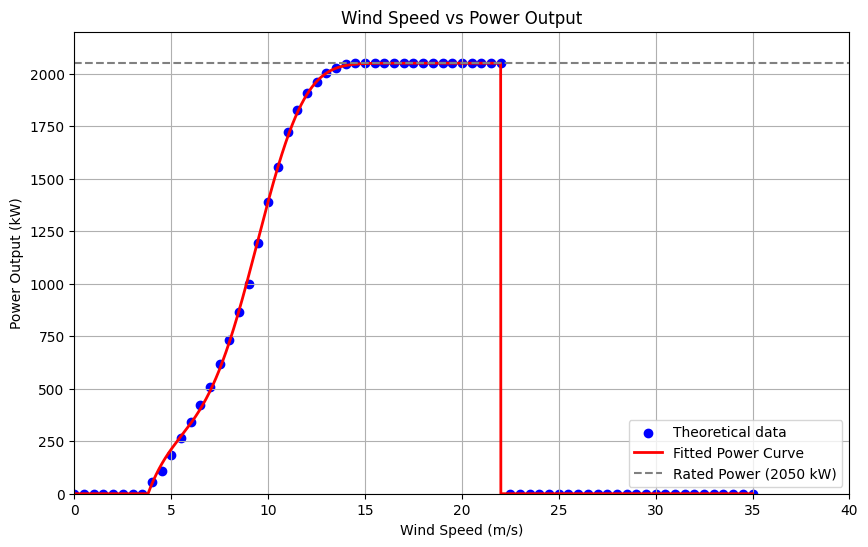

Fitted parameters:
λ1 = 0.12193998594391288, λ2 = -0.034322334838180014, λ3 = 0.007128044053741631


In [10]:
def custom_power_curve(v, lambda1, lambda2, lambda3):
    v_cut = 3.8
    return np.where(
        (v <= 3.8) | (v > 22),
        0,
        (
            1
            - np.exp(
                -(
                    lambda1 * (v - v_cut)
                    + lambda2 * (v - v_cut) ** 2
                    + lambda3 * (v - v_cut) ** 3
                )
            )
        )
        * 2050,
    )


# Fit the model to the data
initial_guess = [0.01, 0.01, 0.01]  # Initial guesses for lambda1, lambda2, lambda3
params, covariance = curve_fit(
    custom_power_curve, wind_speeds_theoretical, power_output_theoretical, p0=initial_guess
)

# Extract fitted parameters
lambda1_fitted, lambda2_fitted, lambda3_fitted = params

# Generate fitted power output
ws = np.arange(0, 35.001, 0.01)
fitted_power = custom_power_curve(ws, lambda1_fitted, lambda2_fitted, lambda3_fitted)

# Plotting the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(wind_speeds_theoretical, power_output_theoretical, color="blue", label="Theoretical data", marker="o")
plt.plot(ws, fitted_power, color="red", label="Fitted Power Curve", linewidth=2)
plt.title("Wind Speed vs Power Output")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power Output (kW)")
plt.xlim(0, max(wind_speeds_theoretical) + 5)  # Adjust x-limits for better view
plt.ylim(0, 2200)  # Adjust y-limits to encompass power range
plt.axhline(y=2050, color="grey", linestyle="--", label="Rated Power (2050 kW)")
plt.legend()
plt.grid()
plt.show()

# Print the fitted parameters
print("Fitted parameters:")
print(f"λ1 = {lambda1_fitted}, λ2 = {lambda2_fitted}, λ3 = {lambda3_fitted}")

Overlay of the theoretical power curve of the provider to the recorded Penmanshiel turbine data

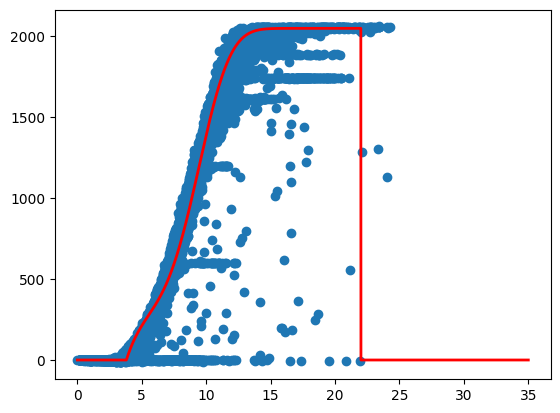

In [11]:
plt.plot(ws, fitted_power, color="red", label="Fitted Power Curve", linewidth=2)
plt.scatter(turbine_2016['Wind speed (m/s)'], turbine_2016['Power (kW)'])


### Analysis of Merged Datasets

#### Loading of Electricity Data

In [14]:
data_2016_electricity = load_turbine_data_dynamic(2016)
data_2016_electricity.head(10)

Attempting to load file: ..\data\zenodo_turbine_data\raw\2016\Turbine_Data_Penmanshiel_09_2016-06-24_-_2017-01-01_1049.csv


,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,"Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)",Events,Status
time,,,,,,,,,,,,,,,,,,,,,
2016-06-24 11:40:00,0.00,0.00,0.00,0.00,5.8,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,Informational - Overfrequency - Warnings (27) ...,Stop
2016-06-24 11:50:00,5.45,0.64,2.74,6.91,5.8,5.55,0.67,2.67,6.99,5.36,...,NaN,NaN,NaN,0.58,0.28,0.05,NaN,NaN,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:00:00,4.51,1.08,1.84,6.28,5.8,4.61,1.12,1.84,6.43,4.42,...,NaN,NaN,NaN,0.56,0.29,0.05,NaN,NaN,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:10:00,3.59,0.64,1.99,5.01,5.8,3.59,0.65,1.98,5.06,3.58,...,NaN,NaN,NaN,0.58,0.30,0.05,NaN,NaN,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:20:00,4.48,0.40,2.92,5.11,5.8,4.53,0.38,3.03,5.19,4.43,...,NaN,NaN,NaN,0.68,0.25,0.06,NaN,NaN,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:30:00,4.36,0.23,3.72,4.92,5.8,4.44,0.21,3.89,5.02,4.27,...,NaN,NaN,NaN,1.02,0.29,0.06,NaN,NaN,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:40:00,4.98,0.23,4.40,5.50,5.8,4.77,0.22,4.22,5.30,5.18,...,NaN,NaN,NaN,0.57,0.26,0.05,NaN,NaN,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:50:00,5.42,0.54,4.34,6.63,5.8,5.26,0.59,4.16,6.66,5.57,...,NaN,NaN,NaN,0.56,0.28,0.04,NaN,NaN,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 13:00:00,5.47,0.43,4.24,6.36,5.8,5.42,0.54,4.03,6.46,5.53,...,NaN,NaN,NaN,0.57,0.29,0.04,NaN,NaN,Stop - Manual brake - Manual stop (service) (...,Stop


### Frequency count of events

In [15]:
status_running = data_2016_electricity[data_2016_electricity['Status'] == 'Running']
# Frequency of "Events" Combinations for Status = Running
running_event_counts = status_running['Events'].value_counts()
pd.DataFrame(running_event_counts)

,count
Events,
Informational - System OK - System OK (32) - Full Performance,11578
Warning - P output externally reduced - Warnings (27) - Partial Performance,5615
Informational - Parameterized P red. - Operating states (28) - | Warning - P output externally reduced - Warnings (27) - Partial Performance,293
Warning - Time sync. failed (SNTP error) - Warnings (27) - Full Performance,284
Informational - System OK - System OK (32) - Full Performance | Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification | Informational - System OK - System OK (32) - Full Performance,266
Warning - P output externally reduced - Warnings (27) - Partial Performance | Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification,194
Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification | Informational - System OK - System OK (32) - Full Performance,25
Informational - System OK - System OK (32) - Full Performance | Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification,25
Warning - P output externally reduced - Warnings (27) - Partial Performance | Warning - Error brake resistor CHP - Warnings (27) - Full Performance,12


### Relationship between Wind Speed and Log Power of entire merged dataset 

In [16]:
turbine_log_powers = data_2016_electricity.copy()
turbine_log_powers['Log Power'] = np.log2(turbine_log_powers["Power (kW)"] + 16)

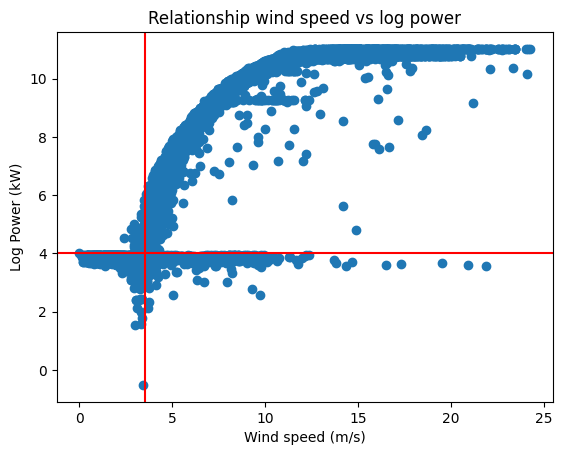

In [17]:
plt.scatter(turbine_log_powers['Wind speed (m/s)'], turbine_log_powers['Log Power'])
plt.title("Relationship wind speed vs log power")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Log Power (kW)")
plt.axhline(y=4, c="red")
plt.axvline(x=3.5, c="red")

### Relationship between Wind Speed and Log Power of entire merged dataset for Status = Running

Text(10, 4.5, 'Power = 0')

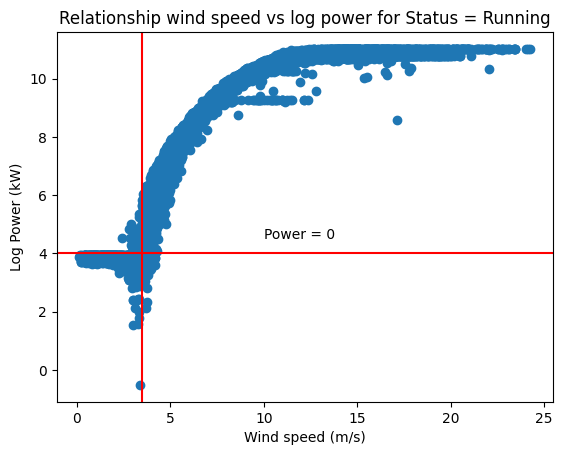

In [18]:
merged_status_running = turbine_log_powers[turbine_log_powers["Status"] == "Running"]
plt.scatter(merged_status_running['Wind speed (m/s)'], np.log2(merged_status_running["Power (kW)"] + 16)) # log2(x + 16) = 4 for x=0 since 2^4 = 16
plt.axhline(y=4, c="red")
plt.axvline(x=3.5, c="red")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Log Power (kW)")
plt.title("Relationship wind speed vs log power for Status = Running")
plt.annotate("Power = 0", [10, 4.5])